In [1]:
#!pip install yfinance
#pip install yfinance --upgrade --no-cache-dir
#pip install pandas-datareader

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt

C:\Users\rites\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### 1. Data Ingestion:
• Develop a script that can ingest OHLC data feeds from various sources and formats.
• Validate the data integrity (e.g., check for missing values, outliers, data type consistency).
• Standardize the data format to a common structure (e.g., pandas DataFrame).


In [17]:
def fetch_stock_data(tickers, start_dt, end_dt):
    start_date = pd.to_datetime(start_dt)
    end_date = pd.to_datetime(end_dt)
    
    period_limit = pd.DateOffset(months=1)
    stock_data = pd.DataFrame()
    
    while start_date <= end_date:
        # Calculate the end date for this period
        period_end = min(start_date + period_limit, end_date)

        # Download stock data for this period
        data = yf.download(tickers, start=start_date, end=period_end)

        # Concatenate the data with the existing DataFrame
        stock_data = pd.concat([stock_data, data])

        # Move to the next period
        start_date = period_end + pd.Timedelta(days=1)
    
    return stock_data

2. Data Cleaning:
• Identify and handle missing values (e.g., imputation, removal).
• Detect and correct outliers using statistical methods or domain knowledge.
• Address any inconsistencies in timestamps or date formats.

Preprocess the fetched stock data.
    
Args:
stock_data (pandas.DataFrame): Historical stock data.
    
Returns:
pandas.DataFrame: Preprocessed stock data.

In [18]:
def preprocess_stock_data(stock_data):
    
    # Drop rows with missing values
    stock_data.dropna(inplace=True)
    
    # Adjust the data format if needed
    
    return stock_data

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [32]:
def fit_arima_model(data, order):
    
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    return fitted_model


In [21]:
def forecast_arima_model(model, steps):
    """
    Forecast future values using ARIMA model.
    
    Args:
    model (statsmodels.tsa.arima.model.ARIMAResultsWrapper): Fitted ARIMA model.
    steps (int): Number of steps to forecast.
    
    Returns:
    numpy.ndarray: Forecasted values.
    """
    forecast = model.forecast(steps=steps)
    return forecast

In [22]:
# Example usage
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = 'AAPL'  # Apple Inc. ticker symbol
    start_date = '2023-01-01'
    end_date = '2024-01-01'
    
    # Fetch data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
    
    # Preprocess data
    preprocessed_data = preprocess_stock_data(stock_data)
    
    # Split data into train and test sets
    train_data = preprocessed_data['Close'][:-30]  # Using the first 10 months as training data
    test_data = preprocessed_data['Close'][-30:]   # Using the last 2 months as test data
    
    # Fit ARIMA model
    order = (5, 1, 0)  # Example order of ARIMA model
    model = fit_arima_model(train_data, order)
    
    # Forecast
    forecast_steps = len(test_data)
    forecast_values = forecast_arima_model(model, forecast_steps)
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
    print(f"RMSE: {rmse}")
    
    # Display the forecasted values
    print("Forecasted values:")
    print(forecast_values)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\rites\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency informati

RMSE: 6.219444215675688
Forecasted values:
209    187.332658
210    187.516429
211    187.802563
212    187.460096
213    187.232849
214    187.254558
215    187.183696
216    187.141213
217    187.183017
218    187.196071
219    187.192965
220    187.206364
221    187.210656
222    187.206146
223    187.206519
224    187.206725
225    187.204766
226    187.204521
227    187.204920
228    187.204657
229    187.204684
230    187.204923
231    187.204908
232    187.204887
233    187.204938
234    187.204926
235    187.204901
236    187.204909
237    187.204907
238    187.204900
Name: predicted_mean, dtype: float64


C:\Users\rites\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
def calculate_moving_average(data, window_size):
   
    moving_avg = data.rolling(window=window_size).mean()
    return moving_avg


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


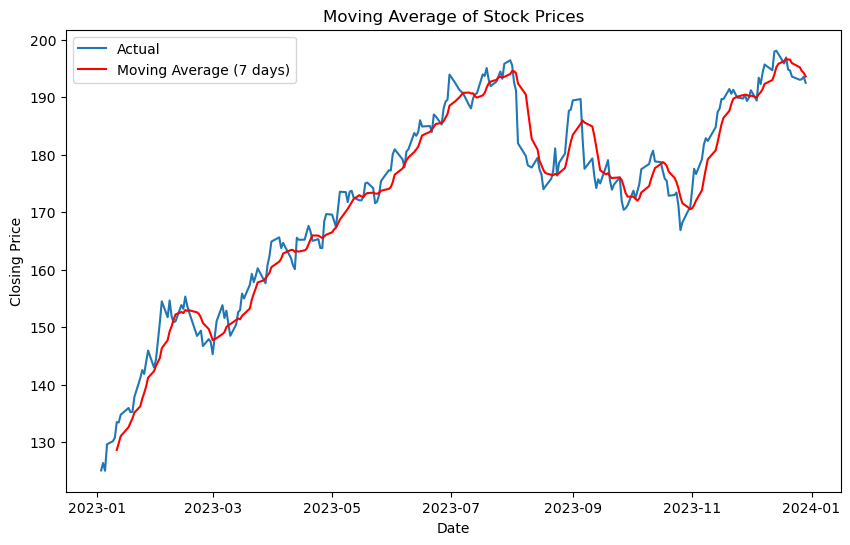

In [24]:

# Example usage
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = 'AAPL'  # Apple Inc. ticker symbol
    start_date = '2023-01-01'
    end_date = '2024-01-01'
    window_size = 7  # Moving average window size
    
    # Fetch data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
    
    # Preprocess data
    preprocessed_data = preprocess_stock_data(stock_data)
    
    # Calculate moving average
    moving_avg = calculate_moving_average(preprocessed_data['Close'], window_size)
    
    # Visualize the moving average and actual data
    plt.figure(figsize=(10, 6))
    plt.plot(preprocessed_data.index, preprocessed_data['Close'], label='Actual')
    plt.plot(moving_avg.index, moving_avg, label=f'Moving Average ({window_size} days)', color='red')
    plt.title('Moving Average of Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()


3. Data Transformation:
• Calculate technical indicators based on OHLC data (e.g., moving averages, Bollinger Bands, Relative Strength Index).
• Apply feature engineering techniques to create new features relevant for your trading strategy (e.g., volatility measures, price patterns).
• Resample the data based on desired frequencies (e.g., daily to hourly).

In [25]:
def calculate_bollinger_bands(data, window_size, num_std):
   
    # Calculate rolling mean and standard deviation
    rolling_mean = data.rolling(window=window_size).mean()
    rolling_std = data.rolling(window=window_size).std()
    
    # Calculate upper and lower bands
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    
    return rolling_mean, upper_band, lower_band



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


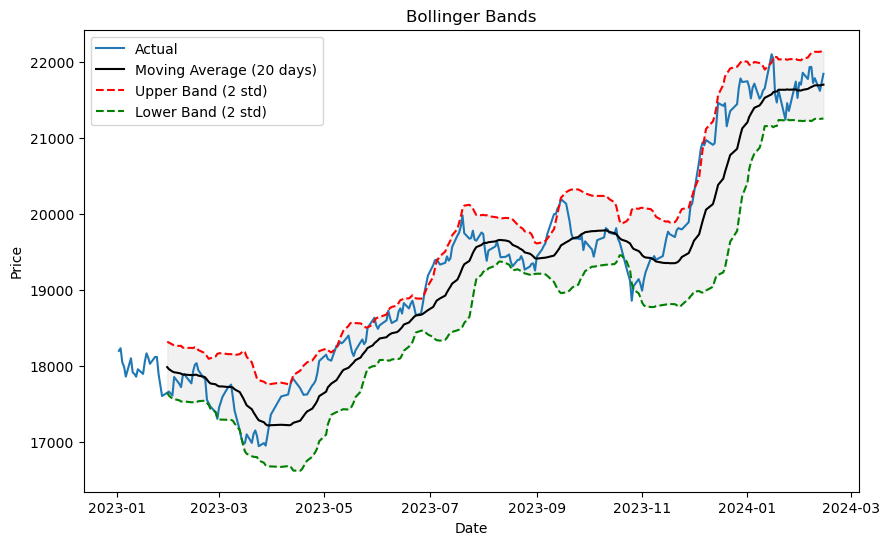

In [39]:
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = '^NSEI'  # Apple Inc. ticker symbol
    start_date = '2023-01-01'
    end_date = '2024-02-15'
    window_size = 20  # Bollinger Bands window size
    num_std = 2  # Number of standard deviations for upper and lower bands
    
    # Fetch data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
    
    # Preprocess data
    preprocessed_data = preprocess_stock_data(stock_data)
    
    # Calculate Bollinger Bands
    rolling_mean, upper_band, lower_band = calculate_bollinger_bands(preprocessed_data['Close'], window_size, num_std)
    
    # Visualize Bollinger Bands and actual data
    plt.figure(figsize=(10, 6))
    plt.plot(preprocessed_data.index, preprocessed_data['Close'], label='Actual')
    plt.plot(rolling_mean.index, rolling_mean, label=f'Moving Average ({window_size} days)', color='black')
    plt.plot(upper_band.index, upper_band, label=f'Upper Band ({num_std} std)', color='red', linestyle='--')
    plt.plot(lower_band.index, lower_band, label=f'Lower Band ({num_std} std)', color='green', linestyle='--')
    plt.fill_between(upper_band.index, upper_band, lower_band, color='lightgray', alpha=0.3)
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


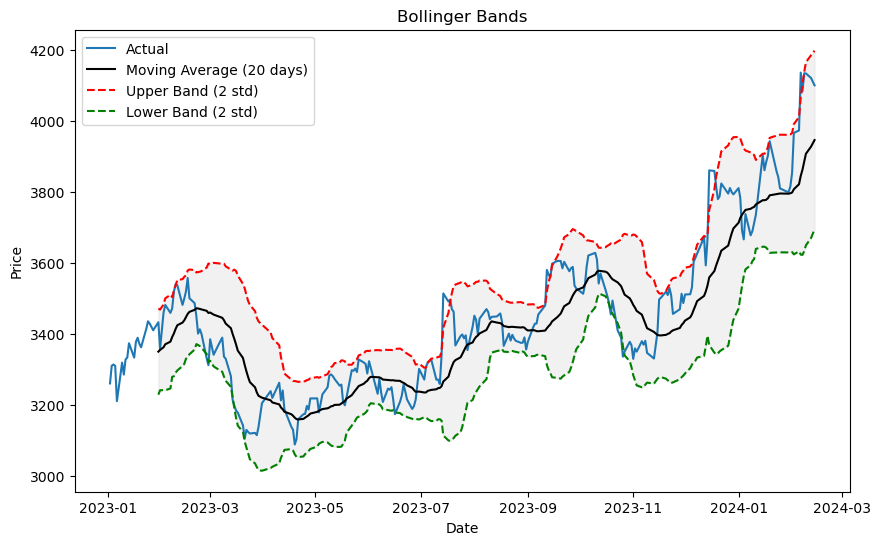

In [35]:
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = 'TCS.NS'  # Apple Inc. ticker symbol
    start_date = '2023-01-01'
    end_date = '2024-02-15'
    window_size = 20  # Bollinger Bands window size
    num_std = 2  # Number of standard deviations for upper and lower bands
    
    # Fetch data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
    
    # Preprocess data
    preprocessed_data = preprocess_stock_data(stock_data)
    
    # Calculate Bollinger Bands
    rolling_mean, upper_band, lower_band = calculate_bollinger_bands(preprocessed_data['Close'], window_size, num_std)
    
    # Visualize Bollinger Bands and actual data
    plt.figure(figsize=(10, 6))
    plt.plot(preprocessed_data.index, preprocessed_data['Close'], label='Actual')
    plt.plot(rolling_mean.index, rolling_mean, label=f'Moving Average ({window_size} days)', color='black')
    plt.plot(upper_band.index, upper_band, label=f'Upper Band ({num_std} std)', color='red', linestyle='--')
    plt.plot(lower_band.index, lower_band, label=f'Lower Band ({num_std} std)', color='green', linestyle='--')
    plt.fill_between(upper_band.index, upper_band, lower_band, color='lightgray', alpha=0.3)
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


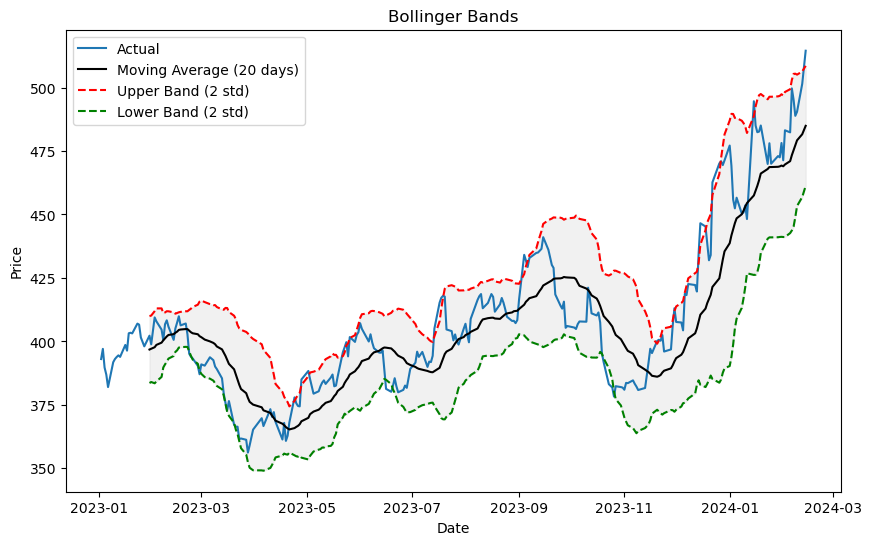

In [37]:
if __name__ == "__main__":
    # Define parameters
    ticker_symbol = 'WIPRO.NS'  # Apple Inc. ticker symbol
    start_date = '2023-01-01'
    end_date = '2024-02-15'
    window_size = 20  # Bollinger Bands window size
    num_std = 2  # Number of standard deviations for upper and lower bands
    
    # Fetch data
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
    
    # Preprocess data
    preprocessed_data = preprocess_stock_data(stock_data)
    
    # Calculate Bollinger Bands
    rolling_mean, upper_band, lower_band = calculate_bollinger_bands(preprocessed_data['Close'], window_size, num_std)
    
    # Visualize Bollinger Bands and actual data
    plt.figure(figsize=(10, 6))
    plt.plot(preprocessed_data.index, preprocessed_data['Close'], label='Actual')
    plt.plot(rolling_mean.index, rolling_mean, label=f'Moving Average ({window_size} days)', color='black')
    plt.plot(upper_band.index, upper_band, label=f'Upper Band ({num_std} std)', color='red', linestyle='--')
    plt.plot(lower_band.index, lower_band, label=f'Lower Band ({num_std} std)', color='green', linestyle='--')
    plt.fill_between(upper_band.index, upper_band, lower_band, color='lightgray', alpha=0.3)
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
